# Task 2: Sparks Foundation - Data Science & ML
## Prediction Using Unsupervised ML
## BOUCHRA BENGHAZALA

## <span style="color:blue">Overview Of KMeans Clustering</span>

Clustering models aim to group data into distinct “clusters” or groups. This can both serve as an interesting view in an analysis, or can serve as a feature in a supervised learning algorithm. 

Consider a social setting where there are groups of people having discussions in different circles around a room. When you first look at the room, you just see a group of people. You could mentally start placing points in the center of each group of people and name that point as a unique identifier. You would then be able to refer to each group by a unique name to describe them. This is essentially what k-means clustering does with data. 

In [67]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as datasets
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

In [68]:
#Loading the dataset
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###  <span style="color:blue">Visualizing the data</span>

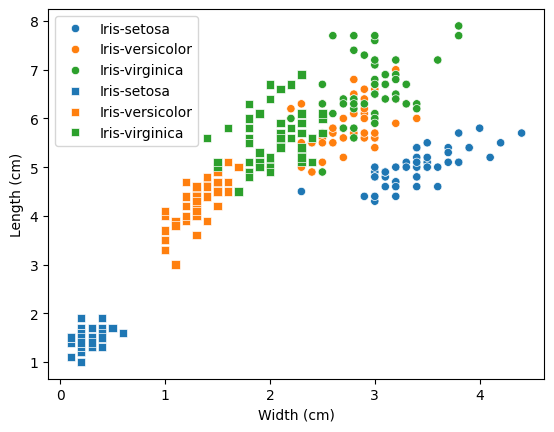

In [69]:
sns.scatterplot(data = iris_data, x = 'SepalWidthCm', y = 'SepalLengthCm', hue = 'Species', marker='o')
sns.scatterplot(data = iris_data, x = 'PetalWidthCm', y = 'PetalLengthCm', hue = 'Species', marker='s')
# Set plot labels and legend
plt.xlabel('Width (cm)')
plt.ylabel('Length (cm)')
plt.legend()

# Show the plot
plt.show()

###  <span style="color:blue">Optimum number of clusters for K Means and value of k</span>

In the context of the K-means clustering algorithm, inertia represents a measure of how internally coherent clusters are. It is calculated as the sum of squared distances of samples to their closest cluster center. In other words, inertia measures how tightly grouped the data points are within each cluster.

When you fit a K-means model to your data, the centroids of the clusters are adjusted iteratively to minimize the inertia. The lower the inertia, the better the clustering results, as it indicates that the clusters are more compact and well-separated.

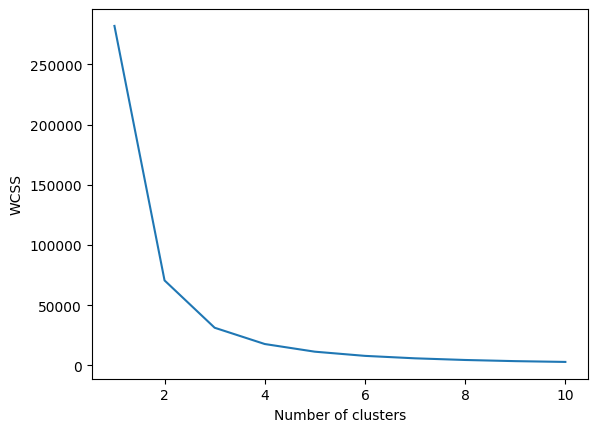

In [70]:
#Dividing dataset into input and output data
X=iris_data.iloc[:,:-1].values
y=iris_data[['Species']].values
#Within-Cluster Sum of Squares
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    #fitting the input to the model
    kmeans.fit(X)
    # the sum of squared distances of samples to their closest cluster center
    wcss.append(kmeans.inertia_)

#Visualizing the optimum number of clusters for KMeans 
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #
plt.show()
    

We notice that the number of clusters is <span style="color:blue">3</span> (This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration)

### <span style="color:blue">Applying K Means to dataset</span>

In [71]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

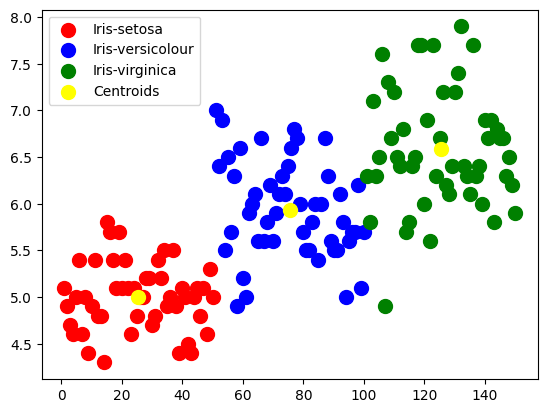

In [79]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa',marker='o')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour',marker='o')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica',marker='o')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()